https://support.prezi.com/hc/es/articles/360045085774--C%C3%B3mo-elegir-el-gr%C3%A1fico-correcto-para-tus-datos

# Guía práctica para elegir gráficos según el tipo de dato

## Introducción
En esta sesión aprenderás cómo elegir correctamente un gráfico según el tipo de datos que quieras representar. Vamos a recorrer distintos tipos de variables, sus gráficos más adecuados, sus problemas más frecuentes y cómo solucionarlos con ejemplos concretos.




## 1. Variables categóricas

### ¿Qué son las variables categóricas?
Son variables que toman valores dentro de un conjunto limitado de categorías o grupos. Por ejemplo, la nacionalidad, el color, o la marca son variables categóricas.

### Gráficos recomendados
#### a. Diagrama de barras

Veamos un ejemplo. Supón que queremos mostrar el número de medallas obtenidas por país en los Juegos Olímpicos:


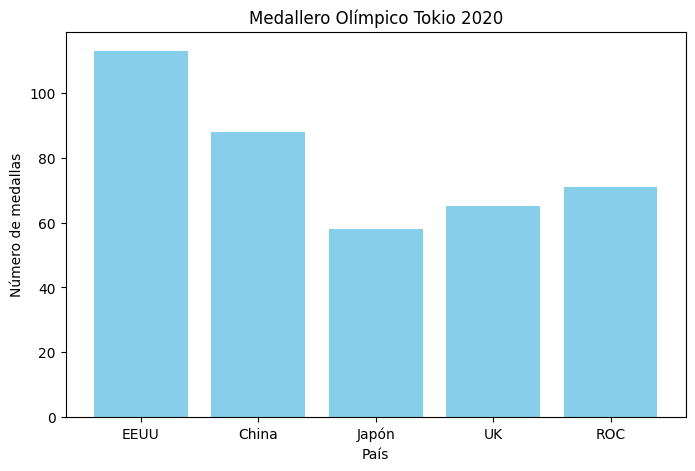

In [1]:

import matplotlib.pyplot as plt

# Datos simulados
paises = ['EEUU', 'China', 'Japón', 'UK', 'ROC']
medallas = [113, 88, 58, 65, 71]

plt.figure(figsize=(8,5))
plt.bar(paises, medallas, color='skyblue')
plt.title('Medallero Olímpico Tokio 2020')
plt.ylabel('Número de medallas')
plt.xlabel('País')
plt.show()




**Problema frecuente:** ¿Y si hay muchas categorías?
Mira qué pasa cuando hay demasiadas categorías:


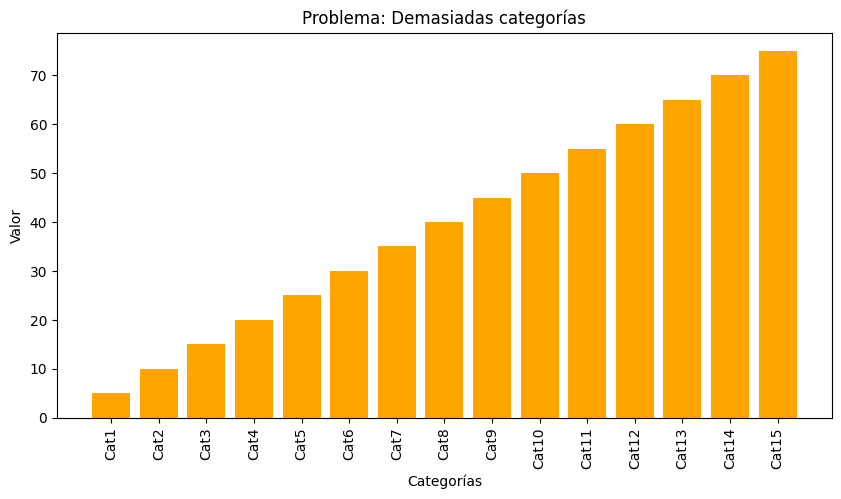

In [2]:

categorias = ['Cat'+str(i) for i in range(1,16)]
valores = [i*5 for i in range(1,16)]

plt.figure(figsize=(10,5))
plt.bar(categorias, valores, color='orange')
plt.title('Problema: Demasiadas categorías')
plt.xlabel('Categorías')
plt.ylabel('Valor')
plt.xticks(rotation=90)
plt.show()




Fíjate cómo las categorías quedan poco legibles porque se superponen o se apelotonan.

**Solución:** Usa un diagrama de barras horizontales:


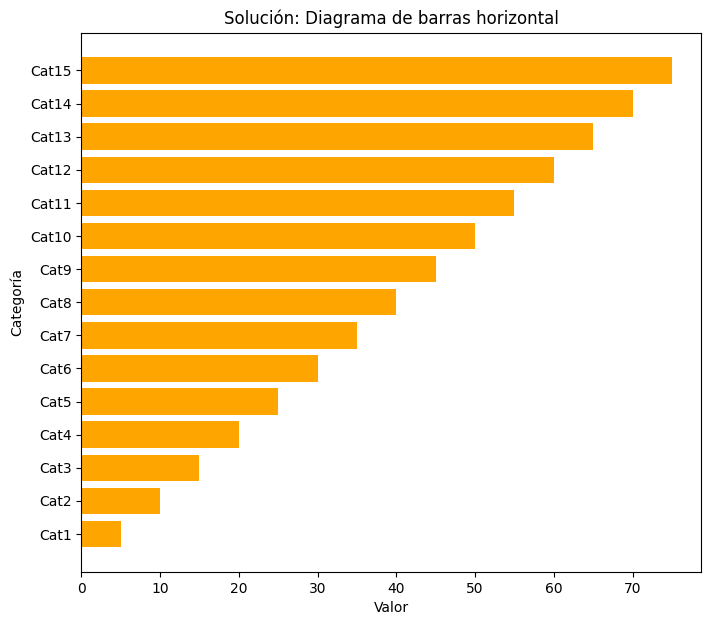

In [4]:

plt.figure(figsize=(8,7))
plt.barh(categorias, valores, color='orange')
plt.title('Solución: Diagrama de barras horizontal')
plt.xlabel('Valor')
plt.ylabel('Categoría')
plt.show()




Así es más claro, especialmente cuando tienes muchas categorías.

#### b. Gráfico circular (pie chart)
Este gráfico es útil cuando tienes muy pocas categorías (máximo cinco), especialmente en variables binarias (sí/no).

Ejemplo típico: diferencias en premios Nobel por género:


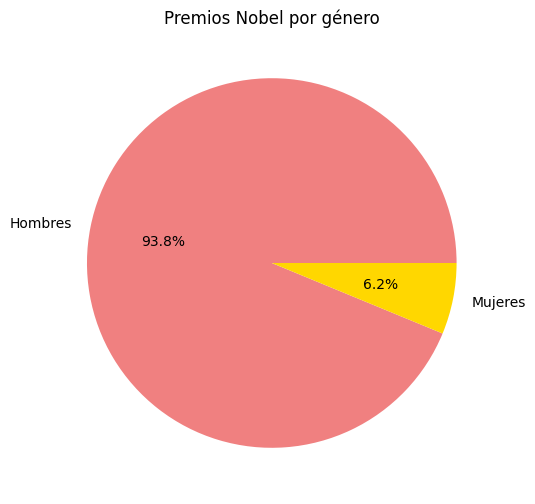

In [5]:

genero = ['Hombres', 'Mujeres']
nobel = [873, 58]

plt.figure(figsize=(6,6))
plt.pie(nobel, labels=genero, autopct='%1.1f%%', colors=['lightcoral','gold'])
plt.title('Premios Nobel por género')
plt.show()



#### c. Diagrama de Pareto
Este gráfico combina barras con una curva de frecuencia acumulada. Es excelente para identificar las categorías que más influyen en el total:


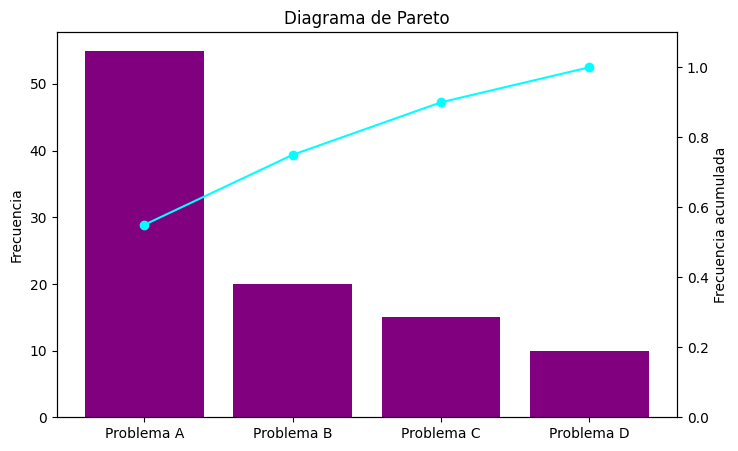

In [ ]:
import pandas as pd

categorias_pareto = ['Problema A', 'Problema B', 'Problema C', 'Problema D']
frecuencias = [55, 20, 15, 10]
pareto_df = pd.DataFrame({'categorias':categorias_pareto, 'frec':frecuencias})
pareto_df = pareto_df.sort_values(by='frec', ascending=False)
pareto_df['acumulado'] = pareto_df['frec'].cumsum() / pareto_df['frec'].sum()

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.bar(pareto_df['categorias'], pareto_df['frec'], color='purple')
ax2 = ax1.twinx()
ax2.plot(pareto_df['categorias'], pareto_df['acumulado'], color='cyan', marker='o')
ax1.set_ylabel('Frecuencia')
ax2.set_ylabel('Frecuencia acumulada')
# ax2.set_ylim(0,1.1)
plt.title('Diagrama de Pareto')
plt.show()



In [7]:
pareto_df

,categorias,frec,acumulado
0,Problema A,55,0.55
1,Problema B,20,0.75
2,Problema C,15,0.90
3,Problema D,10,1.00


## 2. Variables numéricas

Las variables numéricas pueden ser discretas (conteos, como número de hijos) o continuas (como altura o peso).

### Variables discretas

Gráfico ideal: Diagrama de barras o polígono de frecuencias.


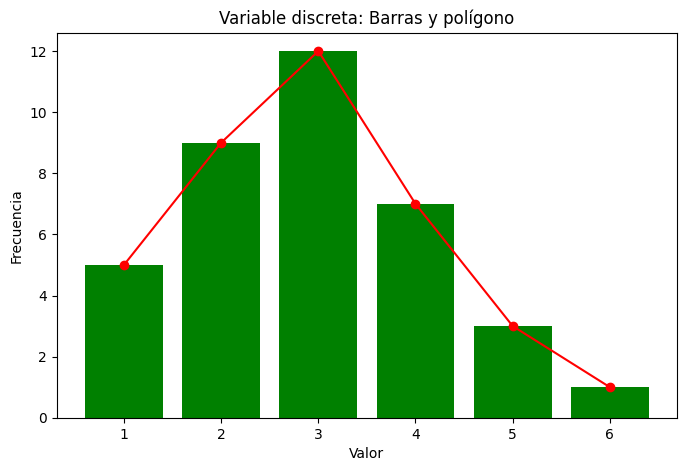

In [11]:

numeros = [1,2,3,4,5,6]
frecuencias = [5, 9, 12, 7, 3, 1]

plt.figure(figsize=(8,5))
plt.bar(numeros, frecuencias, color='green')
plt.plot(numeros, frecuencias, marker='o', color='red')
plt.title('Variable discreta: Barras y polígono')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


### Variables continuas

Para variables continuas, lo ideal es el histograma:


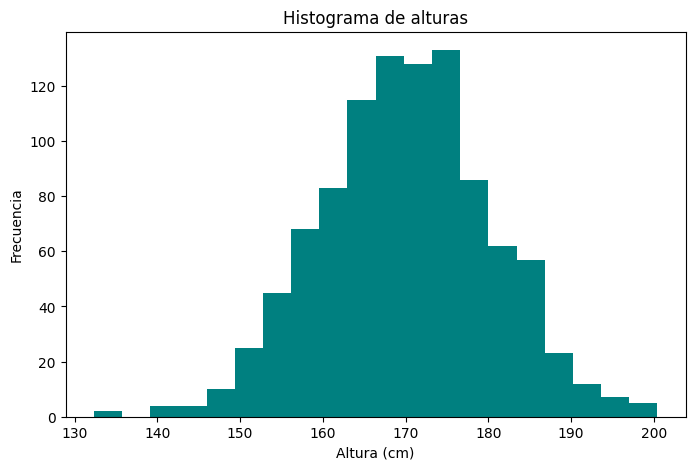

In [12]:
import numpy as np

datos_continuos = np.random.normal(170, 10, 1000)
plt.figure(figsize=(8,5))
plt.hist(datos_continuos, bins=20, color='teal')
plt.title('Histograma de alturas')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.show()


### Curvas de tendencia

Las curvas de tendencia son ideales para observar cambios temporales:


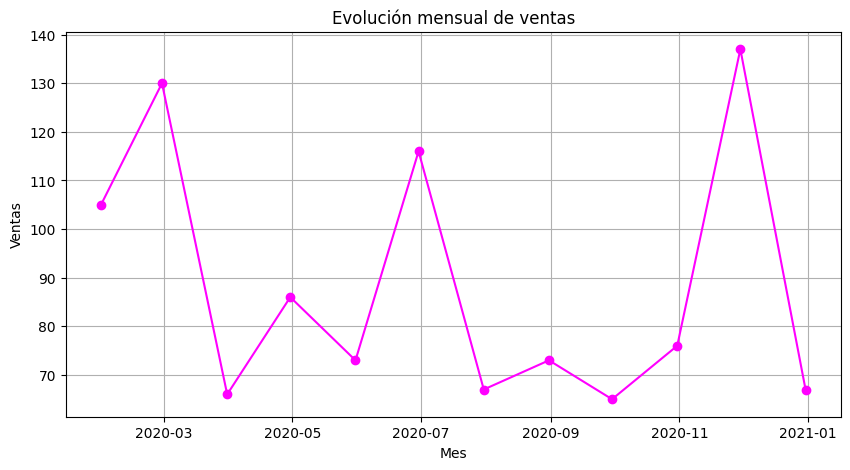

In [14]:

fechas = pd.date_range('2020-01-01', periods=12, freq='ME')
ventas = np.random.randint(50,150, size=12)

plt.figure(figsize=(10,5))
plt.plot(fechas, ventas, marker='o', linestyle='-', color='magenta')
plt.title('Evolución mensual de ventas')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()



## Ejemplos adicionales comunes de gráficos mal usados y cómo mejorarlos

### Ejemplo 1: Uso incorrecto del gráfico circular con muchas categorías

El gráfico circular (pie chart) pierde utilidad cuando se usa con muchas categorías. Observa este problema:


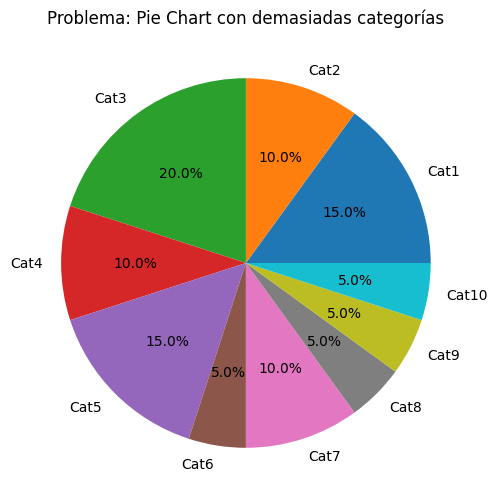

In [15]:


import matplotlib.pyplot as plt

categorias = ['Cat'+str(i) for i in range(1,11)]
valores = [15,10,20,10,15,5,10,5,5,5]

plt.figure(figsize=(6,6))
plt.pie(valores, labels=categorias, autopct='%1.1f%%')
plt.title('Problema: Pie Chart con demasiadas categorías')
plt.show()




Fíjate cómo se vuelve difícil distinguir claramente las proporciones. 

**Solución recomendada:** Usa un diagrama de barras para mejor claridad:


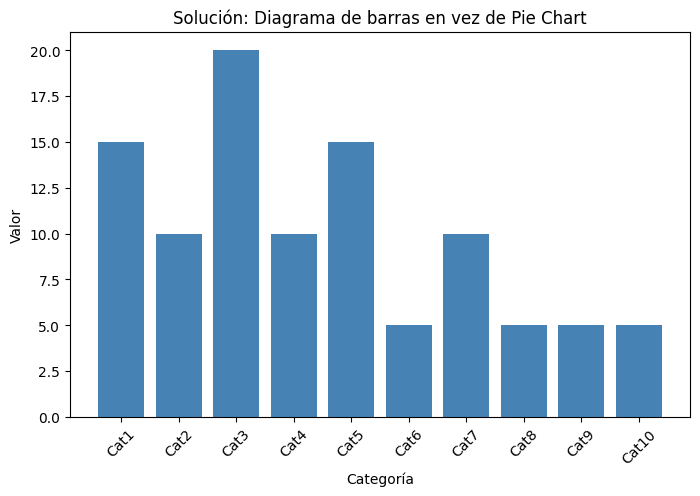

In [16]:

plt.figure(figsize=(8,5))
plt.bar(categorias, valores, color='steelblue')
plt.title('Solución: Diagrama de barras en vez de Pie Chart')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()


### Ejemplo 2: Mal uso del gráfico de líneas para datos categóricos

Un error común es usar gráficos de líneas con variables categóricas que no tienen orden:


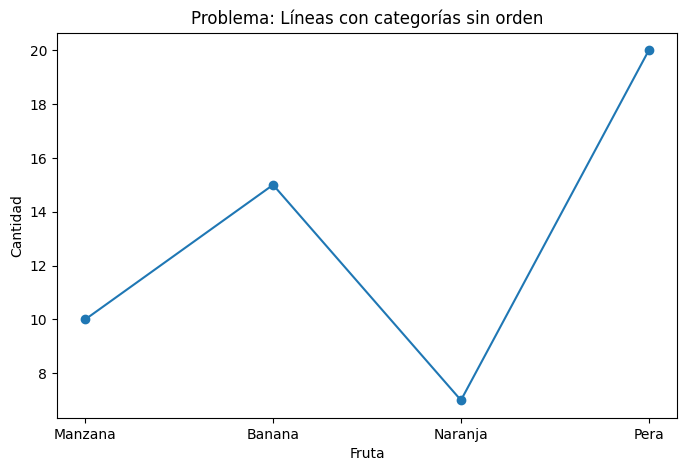

In [17]:

categorias = ['Manzana', 'Banana', 'Naranja', 'Pera']
valores = [10, 15, 7, 20]

plt.figure(figsize=(8,5))
plt.plot(categorias, valores, marker='o', linestyle='-')
plt.title('Problema: Líneas con categorías sin orden')
plt.xlabel('Fruta')
plt.ylabel('Cantidad')
plt.show()




Esto puede inducir a error, sugiriendo una tendencia que no existe.

**Solución recomendada:** Usa un gráfico de barras para evitar falsas interpretaciones:


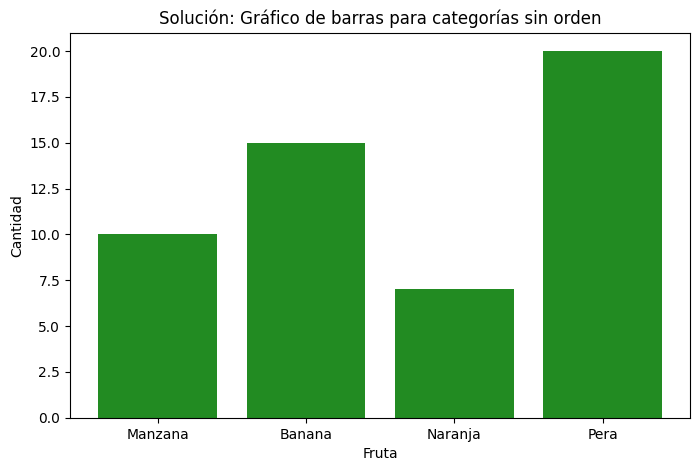

In [18]:
plt.figure(figsize=(8,5))
plt.bar(categorias, valores, color='forestgreen')
plt.title('Solución: Gráfico de barras para categorías sin orden')
plt.xlabel('Fruta')
plt.ylabel('Cantidad')
plt.show()


### Ejemplo 3: Gráfico de dispersión saturado

Cuando hay demasiados puntos, el gráfico de dispersión puede saturarse y dificultar el análisis:


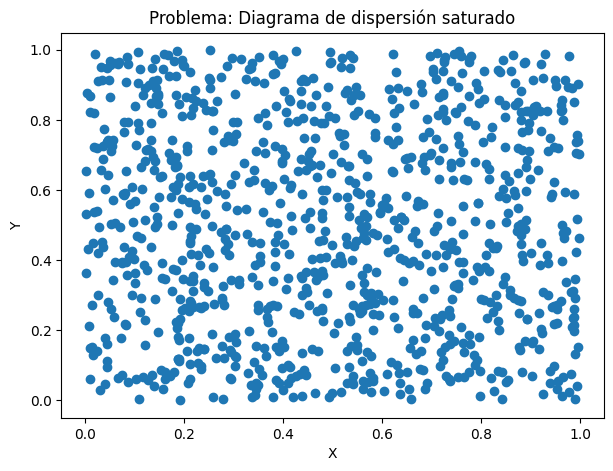

In [19]:
import numpy as np

x = np.random.rand(1000)
y = np.random.rand(1000)

plt.figure(figsize=(7,5))
plt.scatter(x, y)
plt.title('Problema: Diagrama de dispersión saturado')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Esto es visualmente confuso y no permite sacar conclusiones claras.

**Solución recomendada:** Usa un gráfico de densidad (heatmap):


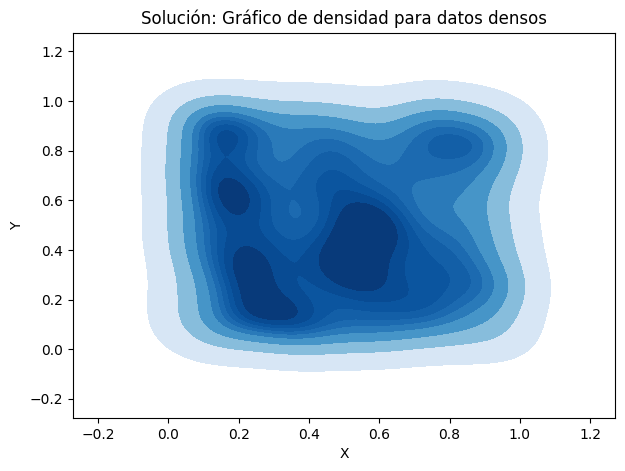

In [20]:

import seaborn as sns

plt.figure(figsize=(7,5))
sns.kdeplot(x=x, y=y, cmap='Blues', fill=True)
plt.title('Solución: Gráfico de densidad para datos densos')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()





## Conclusión

A lo largo de este notebook hemos revisado los gráficos más comunes, sus problemas frecuentes y cómo solucionarlos de forma clara y sencilla.

Recuerda que elegir el gráfico adecuado te permitirá comunicar mejor tus resultados y hacer tus análisis más transparentes y efectivos.
